# x19372016 - Jordan O'Donovan

In [1]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import skimage
import shutil
import glob
from PIL import Image

from matplotlib import pyplot as plt
from matplotlib.image import imread

from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Activation, GlobalMaxPooling1D, GlobalMaxPooling2D
from keras.metrics import BinaryAccuracy, Precision, Recall

In [2]:
dftrain  = pd.read_csv('Data/train/_annotations.csv')
testdf = pd.read_csv('Data/test/_annotations.csv')

In [3]:
dftrain

,filename,width,height,class,xmin,ymin,xmax,ymax
0,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,head,301,100,330,135
1,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,head,340,121,370,158
2,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,head,199,111,223,137
3,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,head,277,109,295,132
4,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,head,154,116,174,141
...,...,...,...,...,...,...,...,...
19753,002219_jpg.rf.ff42125c486dacdf0b881197b5500215...,500,352,helmet,248,74,290,131
19754,002219_jpg.rf.ff42125c486dacdf0b881197b5500215...,500,352,helmet,120,72,152,114
19755,002219_jpg.rf.ff42125c486dacdf0b881197b5500215...,500,352,helmet,288,70,317,106
19756,004208_jpg.rf.ff41745f0340f82a1b3d76d669e084a7...,640,510,helmet,418,69,639,293


In [4]:
dftrain.shape[0]

19758

In [5]:
dftrain.filename.nunique()

5269

In [6]:
testdf

,filename,width,height,class,xmin,ymin,xmax,ymax
0,006873_jpg.rf.00990c1c41fb4872247ec571542c056b...,500,372,head,105,97,145,147
1,006873_jpg.rf.00990c1c41fb4872247ec571542c056b...,500,372,head,334,95,380,151
2,006873_jpg.rf.00990c1c41fb4872247ec571542c056b...,500,372,head,245,111,280,149
3,006873_jpg.rf.00990c1c41fb4872247ec571542c056b...,500,372,head,317,99,341,138
4,006873_jpg.rf.00990c1c41fb4872247ec571542c056b...,500,372,head,284,127,309,157
...,...,...,...,...,...,...,...,...
6661,007011_jpg.rf.fdfffef6ff7aa9553fccbca214a3c5ca...,500,350,helmet,255,121,266,132
6662,007011_jpg.rf.fdfffef6ff7aa9553fccbca214a3c5ca...,500,350,helmet,316,130,325,139
6663,006956_jpg.rf.f9890ec2d82fc5958543187211522ba6...,500,334,helmet,121,142,180,202
6664,006956_jpg.rf.f9890ec2d82fc5958543187211522ba6...,500,334,helmet,349,117,414,183


In [94]:
testdf.filename.nunique()

1766

In [95]:
# Number of rows in both CSV's / number of filenames to get the average number of heads/helmets per image
(19758+6666)/(5269+1766)

3.7560767590618336

In [105]:
dftrain.filename.value_counts().head(20)

004819_jpg.rf.a17c8144556b6652931ed63d1b944134.jpg    35
002290_jpg.rf.c3359352ddfb30001c69a818e80b76db.jpg    30
002463_jpg.rf.b2f2e70c2251e06a2124ff7d5b4d019c.jpg    24
003735_jpg.rf.1fade916dceaaa25f198eb8e120b9a8e.jpg    22
000338_jpg.rf.0afe5ae9d6ce1e5497eb3270c6fb91d8.jpg    21
002953_jpg.rf.ac93d6028ef80106cd56bac2a46492ff.jpg    20
000311_jpg.rf.af6c927c9c705cfc95bb09ff99f291fe.jpg    20
001426_jpg.rf.8f504ea31e48c4a0c4e348bbd9ff557f.jpg    20
004370_jpg.rf.875febe15aa5e0b2324e8f188cda0590.jpg    19
000258_jpg.rf.d80fbfcfdd372c0ade7cce899fecacd9.jpg    18
005019_jpg.rf.bec277c9e80ee12497d1d27f46510485.jpg    18
003356_jpg.rf.b81556b2ff6a12815760d9ee28866ed6.jpg    18
000996_jpg.rf.3d244b4ed7c9ff02fe5c2fbeec068213.jpg    18
004341_jpg.rf.5f82b2589c11c45ab82d7a52be4f8aff.jpg    18
000733_jpg.rf.8b82ffae82db6f078ae540eacdf08021.jpg    18
002729_jpg.rf.78d5f1f94f36c1f2ab0df2a43fe650a4.jpg    18
003681_jpg.rf.04132729acfc439ba19f6ca6fea27fc5.jpg    17
004132_jpg.rf.c897b77f74cc0bca5

In [104]:
testdf.filename.value_counts().head(20)

006026_jpg.rf.0675a5b9d915727461d12fc644c03d5c.jpg    28
006416_jpg.rf.84202685959cdedb6fc83a8d44d8892f.jpg    27
006271_jpg.rf.26152bd99f01ddbe18d6f27b8bc991c4.jpg    19
006944_jpg.rf.0c5e6c0f27c79aeab98888155873e2a4.jpg    18
005778_jpg.rf.61e8787a7dedcc798d9f56e5ce8a5e9c.jpg    17
006916_jpg.rf.25db1e9781eed8da0e99dac699b279d6.jpg    17
006791_jpg.rf.2be24fe43113bef6ee71a846b9d46490.jpg    16
006170_jpg.rf.fd2077959d3ae7201f3ba8c4784b8b18.jpg    16
006391_jpg.rf.1bfc97f513d3b4830e9bd1e3e5c23d44.jpg    15
005599_jpg.rf.1a95045d118da177f22f65270f472e40.jpg    15
005457_jpg.rf.44b81185f7ddc9286805c567057cf9a5.jpg    15
005705_jpg.rf.342328576d77091df9af376ce98b36f5.jpg    15
005445_jpg.rf.375e56397db2d97252d43de4ca6c4ca1.jpg    15
006966_jpg.rf.95805b5e3a40114f80d3fbe2e4cdd68d.jpg    14
006863_jpg.rf.41e04e87964465b8a77d435d581ebc3c.jpg    14
006711_jpg.rf.beb2182f12c8a530074e44eb8a35c908.jpg    14
006268_jpg.rf.09d682bdcbc567d90f826a6aed66e25b.jpg    14
005785_jpg.rf.75101585bafc2346a

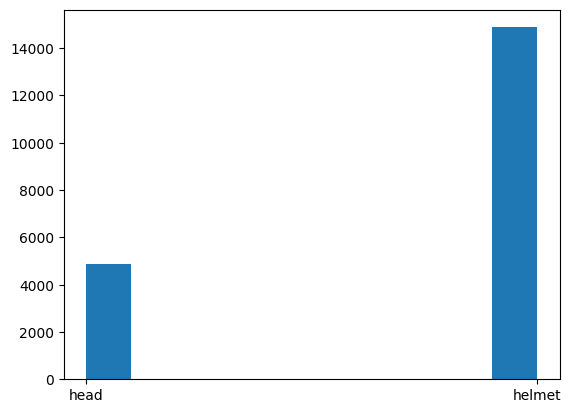

In [7]:
plt.hist(dftrain['class'])
plt.show()

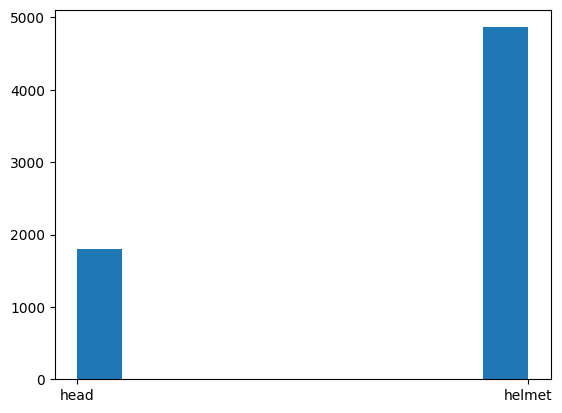

In [8]:
plt.hist(testdf['class'])
plt.show()

In [9]:
images = dftrain

In [10]:
images = images.sort_values(by='class', ascending=False)
images = images.drop_duplicates(subset='filename').reset_index()
images

,index,filename,width,height,class,xmin,ymin,xmax,ymax
0,9879,004178_jpg.rf.5826e7547a9a436e4fb5b959df5b906b...,400,261,helmet,226,2,268,45
1,13170,000491_jpg.rf.900bddc6a14f1e33ec9fa404b58bb015...,449,300,helmet,127,102,162,144
2,13169,004517_jpg.rf.90a6e8a0441347a77728af4259960a6f...,450,300,helmet,164,45,202,83
3,13160,002366_jpg.rf.8fbc7ec137a1397e03fdaf4be84d551a...,500,333,helmet,203,99,287,221
4,13167,005146_jpg.rf.90d1d146821d9c1f4a3c999b4738c47b...,400,299,helmet,164,204,181,219
...,...,...,...,...,...,...,...,...,...
5264,3257,004727_jpg.rf.a854e0143e20a7ef0e26b75edc1e63f4...,500,375,head,160,61,204,121
5265,3262,000531_jpg.rf.a9ac61a8f3b889870cc91cbbad9f5296...,500,375,head,31,148,65,187
5266,3255,000834_jpg.rf.a916d06781957dfd2174a8c7ae97507c...,500,319,head,275,59,300,90
5267,3241,001514_jpg.rf.a8c20c09e3146ca4b6844ff9b6437112...,500,375,head,97,148,142,190


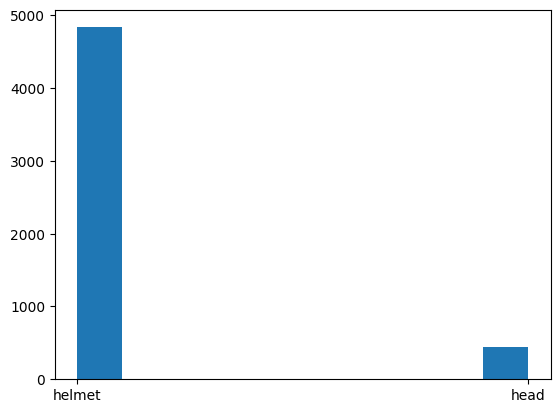

In [11]:
plt.hist(images['class'])
plt.show()

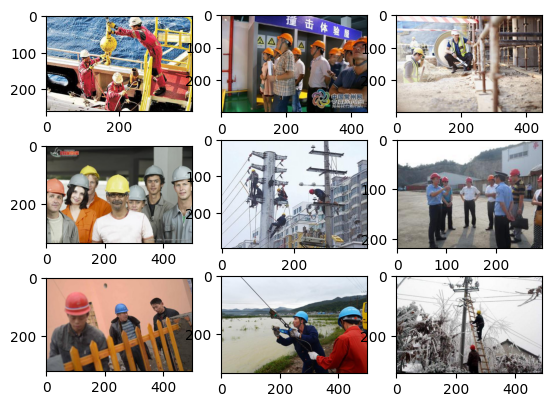

In [12]:
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # define filename
 filename = images.filename[0+i]
 # load image pixels
 image = imread('Data/train/' +filename)
 # plot raw pixel data
 plt.imshow(image)
# show the figure
plt.show()

In [13]:
filenames = dftrain.drop_duplicates(subset='filename')

for index, row in filenames.iterrows():
    if row['class'] == 'helmet':
        print(row['filename'], row['class'])
        shutil.move("Data/train/" + row['filename'], "Data/helmet/" + row['filename'])
    else:
        shutil.move("Data/train/" + row['filename'], "Data/head/" + row['filename'])

In [14]:
filenames = testdf.drop_duplicates(subset='filename')

for index, row in filenames.iterrows():
    if row['class'] == 'helmet':
        print(row['filename'], row['class'])
        shutil.move("Data/test/" + row['filename'], "Data/helmet/" + row['filename'])
    else:
        shutil.move("Data/test/" + row['filename'], "Data/head/" + row['filename'])

In [15]:
model = Sequential()

In [16]:
filename

'003769_jpg.rf.8fb7ca80615bb56b43b7423c0c0dec5d.jpg'

In [17]:
imread('Data/train/' +filename)

array([[[243, 244, 246],
        [247, 248, 250],
        [246, 247, 249],
        ...,
        [217, 222, 225],
        [241, 246, 249],
        [235, 240, 243]],

       [[240, 241, 243],
        [242, 243, 245],
        [242, 243, 245],
        ...,
        [230, 235, 238],
        [235, 240, 243],
        [229, 234, 237]],

       [[244, 245, 247],
        [243, 244, 246],
        [244, 245, 247],
        ...,
        [173, 177, 180],
        [156, 160, 163],
        [151, 155, 158]],

       ...,

       [[ 13,  23,  25],
        [ 13,  21,  24],
        [ 22,  30,  33],
        ...,
        [ 45,  40,  46],
        [ 35,  30,  36],
        [ 33,  28,  34]],

       [[  2,  12,  14],
        [ 21,  29,  32],
        [ 33,  41,  44],
        ...,
        [ 17,  12,  18],
        [ 41,  36,  42],
        [ 43,  38,  44]],

       [[  8,  18,  20],
        [ 47,  55,  58],
        [ 49,  57,  60],
        ...,
        [  9,   4,  10],
        [ 64,  59,  65],
        [ 69,  64,  70]]

In [18]:
filelist = glob.glob('Data/train/*.jpg')

In [19]:
filelist

['Data/train\\000001_jpg.rf.fddb09e33a544e332617f8ceb53ee805.jpg',
 'Data/train\\000002_jpg.rf.85b55e30b8ce745e3c16966991a38018.jpg',
 'Data/train\\000003_jpg.rf.9fc4dfe06775f585757ede9300ba6af9.jpg',
 'Data/train\\000004_jpg.rf.6e499d6a5b40d901d318a92e672842ce.jpg',
 'Data/train\\000005_jpg.rf.2459a55dca0ff3afbe13f8d219a9a818.jpg',
 'Data/train\\000006_jpg.rf.6abcef9263250fa3bae58b72e8987b2b.jpg',
 'Data/train\\000007_jpg.rf.8e98fb789dfc011fb526ce49daf8da31.jpg',
 'Data/train\\000008_jpg.rf.e02009e902c74a6a08eee7ac6ef77bcb.jpg',
 'Data/train\\000009_jpg.rf.2b9c37488ee6a4dcc1193aaac99b9f55.jpg',
 'Data/train\\000010_jpg.rf.ff3d356d21409f8e9fe185536c4ecad9.jpg',
 'Data/train\\000011_jpg.rf.61884ddd74876b2c5be509879237cfe6.jpg',
 'Data/train\\000012_jpg.rf.2e49c7cac1f974388e32964f138453ca.jpg',
 'Data/train\\000013_jpg.rf.44ffce5c7121128de673c897043586c9.jpg',
 'Data/train\\000014_jpg.rf.48b4f5a271e853226260c311fa524ff5.jpg',
 'Data/train\\000015_jpg.rf.33fabf5a1aaea1c89da212e51ebc2e41.j

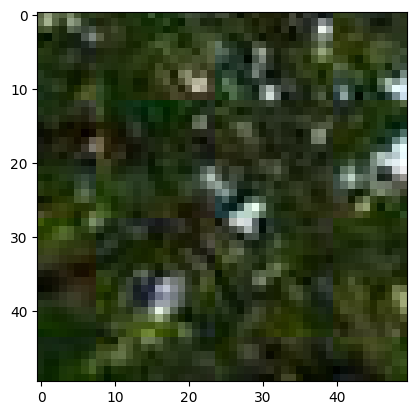

In [21]:
plt.imshow(plt.imread('Data/train/test.jpg')[100:150, 200:250])

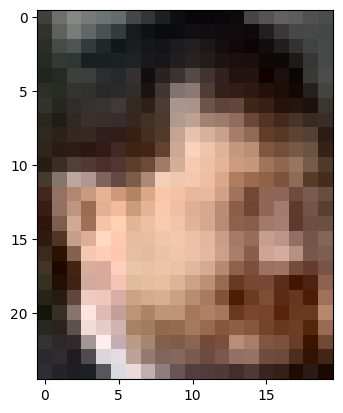

In [22]:
x = 4
while x < 5:
    filename = 'Data/train/' + dftrain.filename[x]
    x1 = dftrain.xmin[x]
    x2 = dftrain.xmax[x]
    y1 = dftrain.ymin[x]
    y2 = dftrain.ymax[x]
    plt.imshow(plt.imread(filename)[y1:y2, x1:x2])
    x+=2

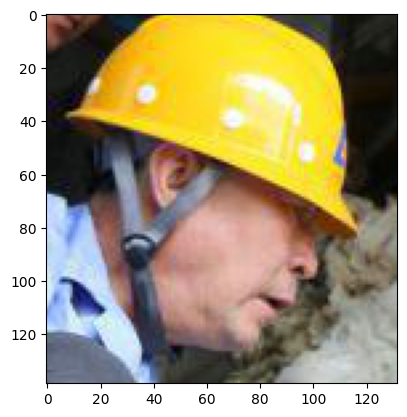

In [23]:
x = 6001
filename = 'Data/train/' + dftrain.filename[x]
x1 = dftrain.xmin[x]
x2 = dftrain.xmax[x]
y1 = dftrain.ymin[x]
y2 = dftrain.ymax[x]
plt.imshow(plt.imread(filename)[y1:y2, x1:x2])

# Creating a folder with the cropped images from train folder
x = 0
for index, row in dftrain.iterrows():
    
    filename = 'Data/train/' + dftrain.filename[x]
    x1 = dftrain.xmin[x]
    x2 = dftrain.xmax[x]
    y1 = dftrain.ymin[x]
    y2 = dftrain.ymax[x]
    plt.imread(filename)[y1:y2, x1:x2]
    plt.imshow(plt.imread(filename)[y1:y2, x1:x2])
    #plt.savefig('teest'+str(x)+'.jpg')
    
    img = Image.open(filename)
    #img.show()
    box = (x1, y1, x2, y2)
    img2 = img.crop(box)
    if row['class'] == 'head':
        img2.save('Data/head/cropped_'+str(x)+'.jpg')
    else:
        img2.save('Data/helmet/cropped_'+str(x)+'.jpg')
    #img2.show()

    x+=1

In [24]:
testdf.shape

(6666, 8)

# Creating a folder with the cropped images from test folder
x = 0
for index, row in testdf.iterrows():
    
    filename = 'Data/test/' + testdf.filename[x]
    x1 = testdf.xmin[x]
    x2 = testdf.xmax[x]
    y1 = testdf.ymin[x]
    y2 = testdf.ymax[x]
    
    img = Image.open(filename)
    box = (x1, y1, x2, y2)
    img2 = img.crop(box)
    if row['class'] == 'head':
        img2.save('Data/head/cropped_test_'+str(x)+'.jpg')
    else:
        img2.save('Data/helmet/cropped_test_'+str(x)+'.jpg')

    x+=1

In [25]:
img = Image.open(filename)
img.show()
box = (x1, y1, x2, y2)
img2 = img.crop(box)
#img2.save('myimage_cropped.jpg')
img2.show()

In [26]:
plt.imread(filename)

array([[[175, 164, 170],
        [181, 172, 177],
        [192, 183, 188],
        ...,
        [129, 140, 146],
        [132, 143, 149],
        [134, 145, 151]],

       [[188, 182, 186],
        [197, 191, 195],
        [208, 202, 206],
        ...,
        [126, 137, 143],
        [128, 139, 145],
        [130, 141, 147]],

       [[188, 186, 189],
        [176, 176, 178],
        [173, 173, 175],
        ...,
        [131, 142, 148],
        [132, 143, 149],
        [132, 143, 149]],

       ...,

       [[115, 116, 110],
        [116, 117, 111],
        [114, 114, 106],
        ...,
        [138, 114,  68],
        [142, 118,  72],
        [136, 112,  66]],

       [[109, 110, 104],
        [114, 114, 106],
        [113, 113, 105],
        ...,
        [144, 117,  70],
        [152, 125,  78],
        [148, 121,  74]],

       [[101, 101,  93],
        [106, 106,  98],
        [110, 107,  98],
        ...,
        [143, 117,  68],
        [153, 127,  78],
        [150, 124,  75]]

# Pre Processing

In [115]:
data = tf.keras.utils.image_dataset_from_directory('Data/cropped')

Found 26424 files belonging to 2 classes.


In [116]:
data_iterator = data.as_numpy_iterator()

In [120]:
batch = data_iterator.next()

In [121]:
# Labels for this batch
batch[1]

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

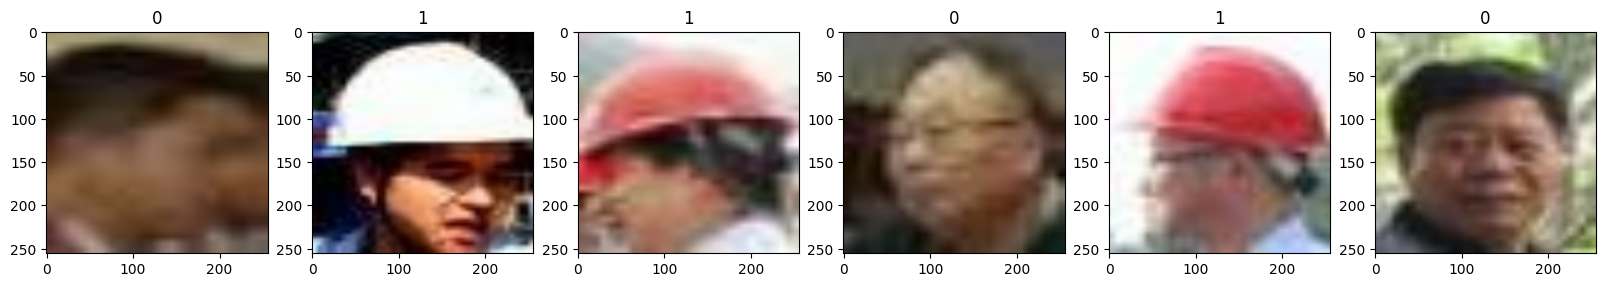

In [122]:
# 1 = helmet, 0 = head
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [123]:
# Reducing each pixel to between 0 and 1
data = data.map(lambda x,y: (x/255, y))

In [124]:
# Setting the amount of data to be used to train, test and validate
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [125]:
# Splitting the data into train/test/validation subsets
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [126]:
# 82 batches
len(test)

82

# Model 1

In [57]:
model = Sequential()

In [58]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [59]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
fit1 = model.fit(train, epochs=15, validation_data=val)

Epoch 1/15
578/578 [==============================] - 609s 1s/step - loss: 0.4881 - accuracy: 0.9471 - val_loss: 0.1294 - val_accuracy: 0.9583
Epoch 2/15
578/578 [==============================] - 568s 982ms/step - loss: 0.1050 - accuracy: 0.9646 - val_loss: 0.1221 - val_accuracy: 0.9589
Epoch 3/15
578/578 [==============================] - 570s 986ms/step - loss: 0.0971 - accuracy: 0.9664 - val_loss: 0.1139 - val_accuracy: 0.9634
Epoch 4/15
578/578 [==============================] - 565s 978ms/step - loss: 0.0921 - accuracy: 0.9690 - val_loss: 0.1089 - val_accuracy: 0.9659
Epoch 5/15
578/578 [==============================] - 568s 983ms/step - loss: 0.0869 - accuracy: 0.9691 - val_loss: 0.1043 - val_accuracy: 0.9686
Epoch 6/15
578/578 [==============================] - 564s 975ms/step - loss: 0.0721 - accuracy: 0.9742 - val_loss: 0.1010 - val_accuracy: 0.9686
Epoch 7/15
578/578 [==============================] - 565s 978ms/step - loss: 0.0712 - accuracy: 0.9749 - val_loss: 0.1071 - va

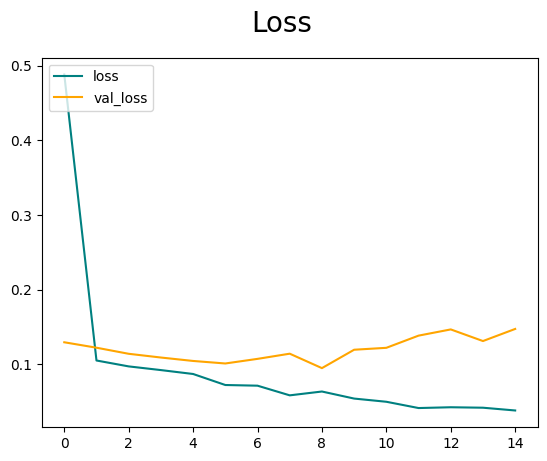

In [62]:
fig = plt.figure()
plt.plot(fit1.history['loss'], color='teal', label='loss')
plt.plot(fit1.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

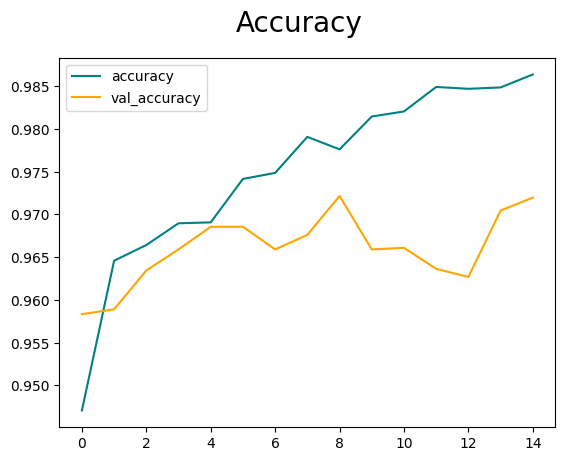

In [63]:
fig = plt.figure()
plt.plot(fit1.history['accuracy'], color='teal', label='accuracy')
plt.plot(fit1.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [64]:
 score = model.evaluate(test,
 batch_size=32)

82/82 [==============================] - 33s 224ms/step - loss: 0.1360 - accuracy: 0.9699


In [65]:
test_eval = model.evaluate(test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.13412530720233917
Test accuracy: 0.9695122241973877


# Model 4 - experimenting with regularization

In [ ]:
model4 = Sequential()

In [84]:
# Experimenting with Regularization
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model4.add(MaxPooling2D((2, 2)))
model4.add(Flatten())
model4.add(Dense(128, activation='relu',  activity_regularizer=tf.keras.regularizers.L2(0.01)))
model4.add(Dense(1, activation='sigmoid'))

In [85]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
fit4 = model.fit(train, epochs=3, validation_data=val)

Epoch 1/3
578/578 [==============================] - 660s 1s/step - loss: 0.0379 - accuracy: 0.9870 - val_loss: 0.1607 - val_accuracy: 0.9680
Epoch 2/3
578/578 [==============================] - 628s 1s/step - loss: 0.0287 - accuracy: 0.9899 - val_loss: 0.1525 - val_accuracy: 0.9678
Epoch 3/3
578/578 [==============================] - 661s 1s/step - loss: 0.0348 - accuracy: 0.9878 - val_loss: 0.1750 - val_accuracy: 0.9638


# Model 5 - regularization and dropout

In [86]:
model5 = Sequential()

In [87]:
# Adding regularization to the first layer and two dropout layers
model5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), activity_regularizer=tf.keras.regularizers.L2(0.01)))
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(1, activation='sigmoid'))

In [48]:
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [91]:
fit5 = model5.fit(train, epochs=10, validation_data=val)

Epoch 1/10
578/578 [==============================] - 860s 1s/step - loss: 8.6706 - accuracy: 0.7474 - val_loss: 0.5487 - val_accuracy: 0.7506
Epoch 2/10
578/578 [==============================] - 871s 2s/step - loss: 0.4730 - accuracy: 0.7632 - val_loss: 0.5133 - val_accuracy: 0.7494
Epoch 3/10
578/578 [==============================] - 886s 2s/step - loss: 0.4082 - accuracy: 0.8133 - val_loss: 0.2974 - val_accuracy: 0.9129
Epoch 4/10
578/578 [==============================] - 791s 1s/step - loss: 0.2916 - accuracy: 0.9114 - val_loss: 0.2743 - val_accuracy: 0.9140
Epoch 5/10
578/578 [==============================] - 822s 1s/step - loss: 0.2549 - accuracy: 0.9273 - val_loss: 0.2922 - val_accuracy: 0.9239
Epoch 6/10
482/578 [========================>.....] - ETA: 2:14 - loss: 0.2416 - accuracy: 0.9294

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential_7/max_pooling2d_9/MaxPool/MaxPoolGrad' defined at (most recent call last):
    File "C:\Users\odono\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\odono\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\odono\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\odono\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\odono\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\odono\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\odono\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\odono\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\odono\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\odono\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\odono\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\odono\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\odono\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\odono\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\odono\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\odono\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "C:\Users\odono\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "C:\Users\odono\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\odono\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\odono\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\odono\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\odono\AppData\Local\Temp\ipykernel_16652\1747143363.py", line 1, in <cell line: 1>
      fit5 = model5.fit(train, epochs=10, validation_data=val)
    File "C:\Users\odono\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\odono\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\odono\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\odono\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\odono\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\odono\anaconda3\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\odono\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\odono\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "C:\Users\odono\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential_7/max_pooling2d_9/MaxPool/MaxPoolGrad'
OOM when allocating tensor with shape[32,254,254,32] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node gradient_tape/sequential_7/max_pooling2d_9/MaxPool/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_112398]

In [49]:
fit5 = model5.fit(train, epochs=10, validation_data=val)

Epoch 1/10
578/578 [==============================] - 825s 1s/step - loss: 5.6791 - accuracy: 0.8839 - val_loss: 0.2720 - val_accuracy: 0.9343
Epoch 2/10
578/578 [==============================] - 820s 1s/step - loss: 0.2570 - accuracy: 0.9274 - val_loss: 0.2337 - val_accuracy: 0.9299
Epoch 3/10
578/578 [==============================] - 838s 1s/step - loss: 0.2284 - accuracy: 0.9311 - val_loss: 0.2065 - val_accuracy: 0.9402
Epoch 4/10
578/578 [==============================] - 810s 1s/step - loss: 0.2130 - accuracy: 0.9353 - val_loss: 0.1984 - val_accuracy: 0.9381
Epoch 5/10
578/578 [==============================] - 888s 2s/step - loss: 0.2013 - accuracy: 0.9379 - val_loss: 0.1868 - val_accuracy: 0.9443
Epoch 6/10
578/578 [==============================] - 843s 1s/step - loss: 0.1913 - accuracy: 0.9411 - val_loss: 0.2007 - val_accuracy: 0.9405
Epoch 7/10
578/578 [==============================] - 818s 1s/step - loss: 0.1764 - accuracy: 0.9457 - val_loss: 0.2929 - val_accuracy: 0.8830

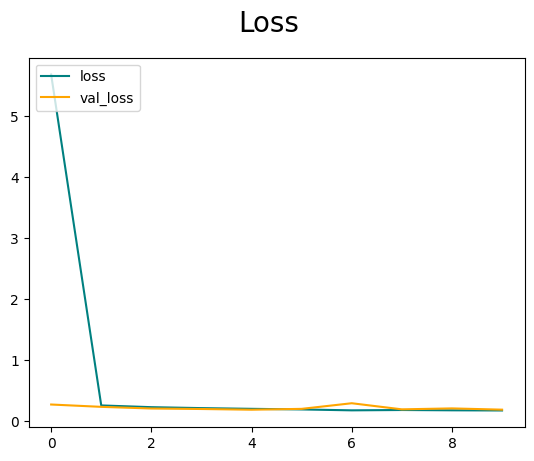

In [50]:
fig = plt.figure()
plt.plot(fit5.history['loss'], color='teal', label='loss')
plt.plot(fit5.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

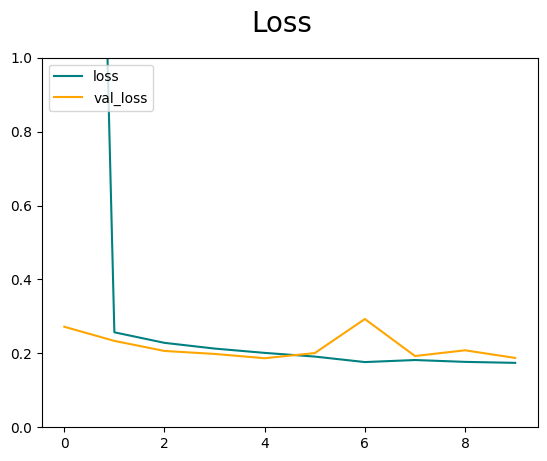

In [54]:
fig = plt.figure()
plt.plot(fit5.history['loss'], color='teal', label='loss')
plt.plot(fit5.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.ylim(0,1)
plt.show()

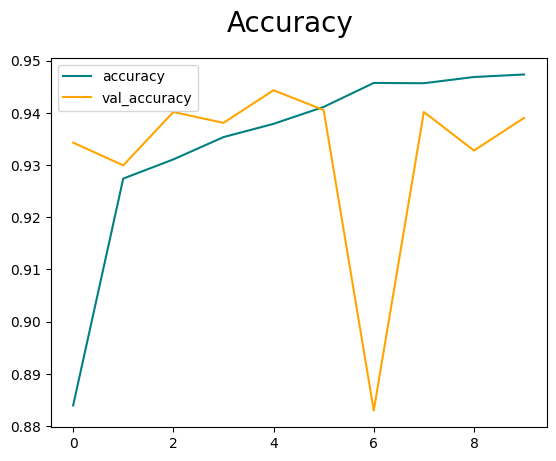

In [51]:
fig = plt.figure()
plt.plot(fit5.history['accuracy'], color='teal', label='accuracy')
plt.plot(fit5.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [69]:
precision5 = Precision()
recall5 = Recall()
binacc5 = BinaryAccuracy()

In [70]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    prediction = model5.predict(X)
    precision5.update_state(y, prediction)
    recall5.update_state(y, prediction)
    binacc5.update_state(y, prediction)

1/1 [==============================] - 0s 285ms/step


In [78]:
print(f"Precision: {precision5.result()}")
print(f"Recall: {recall5.result()}")
print(f"Binary Accuracy: {binacc5.result()}")

Precision: 0.9506971836090088
Recall: 0.9729867577552795
Binary Accuracy: 0.9420731663703918


In [80]:
# 2 x (precision x recall) / (precision + recall)
print(f"F1 score: {2 * (.95*.97)/(.95+.97)}")

F1 score: 0.9598958333333334


# Model 6 - experimenting with learning rate

In [89]:
model6 = Sequential()

In [90]:
# Changing the learning rate of the above model
model6.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), activity_regularizer=tf.keras.regularizers.L2(0.01)))
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.25))
model6.add(Flatten())
model6.add(Dense(128, activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(1, activation='sigmoid'))

In [91]:
adam = keras.optimizers.Adam(learning_rate=0.01)

In [92]:
model6.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [93]:
fit6 = model6.fit(train, epochs=10, validation_data=val)

Epoch 1/10
578/578 [==============================] - 850s 1s/step - loss: 1.3254 - accuracy: 0.7492 - val_loss: 0.5691 - val_accuracy: 0.7447
Epoch 2/10
578/578 [==============================] - 835s 1s/step - loss: 0.5627 - accuracy: 0.7508 - val_loss: 0.5719 - val_accuracy: 0.7428
Epoch 3/10
578/578 [==============================] - 815s 1s/step - loss: 0.5620 - accuracy: 0.7508 - val_loss: 0.5671 - val_accuracy: 0.7462
Epoch 4/10
578/578 [==============================] - 958s 2s/step - loss: 0.5622 - accuracy: 0.7508 - val_loss: 0.5662 - val_accuracy: 0.7470
Epoch 5/10
578/578 [==============================] - 943s 2s/step - loss: 0.5617 - accuracy: 0.7508 - val_loss: 0.5673 - val_accuracy: 0.7460
Epoch 6/10
578/578 [==============================] - 930s 2s/step - loss: 0.5617 - accuracy: 0.7509 - val_loss: 0.5680 - val_accuracy: 0.7458
Epoch 7/10
578/578 [==============================] - 990s 2s/step - loss: 0.5613 - accuracy: 0.7511 - val_loss: 0.5673 - val_accuracy: 0.7462

# Model 2 - experimenting with dropout

In [66]:
model2 = Sequential()

In [67]:
# Adding Dropout layers to check for overfitting
model2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model2.add(MaxPooling2D())
model2.add(Conv2D(32, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [68]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
fit2 = model2.fit(train, epochs=15, validation_data=val)

Epoch 1/15
578/578 [==============================] - 624s 1s/step - loss: 0.1373 - accuracy: 0.9530 - val_loss: 0.1016 - val_accuracy: 0.9680
Epoch 2/15
578/578 [==============================] - 618s 1s/step - loss: 0.0913 - accuracy: 0.9690 - val_loss: 0.0991 - val_accuracy: 0.9684
Epoch 3/15
578/578 [==============================] - 634s 1s/step - loss: 0.0825 - accuracy: 0.9709 - val_loss: 0.0903 - val_accuracy: 0.9689
Epoch 4/15
578/578 [==============================] - 618s 1s/step - loss: 0.0790 - accuracy: 0.9714 - val_loss: 0.0900 - val_accuracy: 0.9699
Epoch 5/15
578/578 [==============================] - 633s 1s/step - loss: 0.0704 - accuracy: 0.9745 - val_loss: 0.0799 - val_accuracy: 0.9735
Epoch 6/15
578/578 [==============================] - 618s 1s/step - loss: 0.0598 - accuracy: 0.9779 - val_loss: 0.0837 - val_accuracy: 0.9741
Epoch 7/15
578/578 [==============================] - 617s 1s/step - loss: 0.0507 - accuracy: 0.9820 - val_loss: 0.0847 - val_accuracy: 0.9718

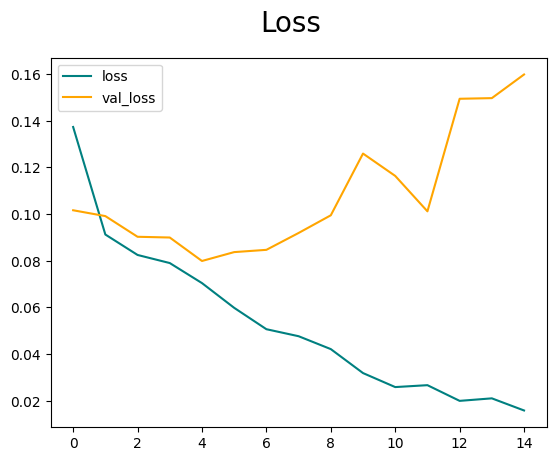

In [71]:
fig = plt.figure()
plt.plot(fit2.history['loss'], color='teal', label='loss')
plt.plot(fit2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

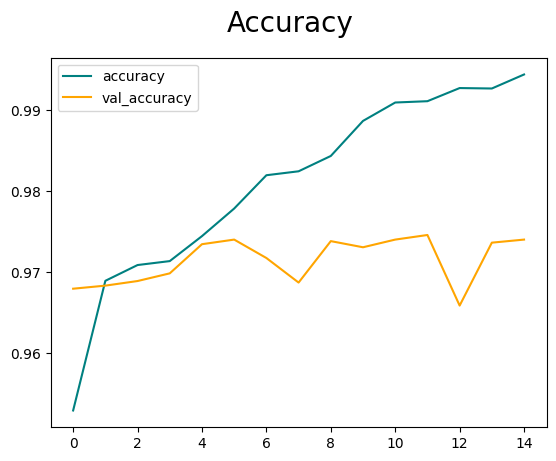

In [72]:
fig = plt.figure()
plt.plot(fit2.history['accuracy'], color='teal', label='accuracy')
plt.plot(fit2.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [73]:
 score2 = model2.evaluate(test,
 batch_size=32)

82/82 [==============================] - 37s 264ms/step - loss: 0.1455 - accuracy: 0.9718


In [74]:
test_eval2 = model2.evaluate(test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.13412530720233917
Test accuracy: 0.9695122241973877


# Model 3 - DataCamp cheat sheet

In [75]:
model3 = Sequential()

In [76]:
# Datacamp cheat sheet
model3.add(Conv2D(32,(3,3),padding='same',input_shape=(256,256,3)))
model3.add(Activation('relu'))
model3.add(Conv2D(32,(3,3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64,(3,3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(64,(3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1))
model3.add(Activation('sigmoid'))

In [77]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [79]:
fit3 = model3.fit(train, epochs=5, validation_data=val)

Epoch 1/5
578/578 [==============================] - 4075s 7s/step - loss: 0.2226 - accuracy: 0.9414 - val_loss: 0.1141 - val_accuracy: 0.9621
Epoch 2/5
 13/578 [..............................] - ETA: 57:00 - loss: 0.1275 - accuracy: 0.9447

KeyboardInterrupt: 

In [80]:
4075/60

67.91666666666667

In [81]:
test_eval3 = model3.evaluate(test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.13412530720233917
Test accuracy: 0.9695122241973877


# VGG

In [39]:
from tensorflow.keras.applications import VGG16

In [40]:
VGG16

<function keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax')>

In [41]:
vgg1 = VGG16(include_top=False)

In [41]:
vgg1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [42]:
# Reshaping the train/test/validation to 224,224 instead of 256,256 as VGG16 and ResNet50 require it
datavgg = tf.keras.utils.image_dataset_from_directory('Data/cropped', image_size=(224, 224))

# Reducing each pixel to between 0 and 1
datavgg = datavgg.map(lambda x,y: (x/255, y))

# Setting the amount of data to be used to train, test and validate
trainvgg_size = int(len(datavgg)*.7)
valvgg_size = int(len(datavgg)*.2)
testvgg_size = int(len(datavgg)*.1)

# Splitting the data into train/test/validation subsets
trainvgg = datavgg.take(trainvgg_size)
valvgg = datavgg.skip(trainvgg_size).take(valvgg_size)
testvgg = datavgg.skip(trainvgg_size+valvgg_size).take(testvgg_size)

Found 26424 files belonging to 2 classes.


In [43]:
datavgg

<MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [47]:
# Ran completely previously, results below are from that run
pred = vgg1.predict(trainvgg)

KeyboardInterrupt: 

In [44]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [48]:
# Decode the output of the VGG16 model.
pred_decoded = decode_predictions(pred)[0]

# Print the predictions.
for code, name, score in pred_decoded:
    print("{0:>6.2%} : {1}".format(score, name))

 3.32% : mosquito_net
 1.92% : toilet_tissue
 1.31% : water_snake
 1.14% : dough
 1.06% : Band_Aid


In [49]:
pred_decoded

[('n03788365', 'mosquito_net', 0.03323235),
 ('n15075141', 'toilet_tissue', 0.019203817),
 ('n01737021', 'water_snake', 0.013062173),
 ('n07860988', 'dough', 0.011403329),
 ('n02786058', 'Band_Aid', 0.0106089115)]

In [53]:
decode_predictions(pred)[500]

[('n03788365', 'mosquito_net', 0.020280316),
 ('n01737021', 'water_snake', 0.0135872075),
 ('n15075141', 'toilet_tissue', 0.01299564),
 ('n03291819', 'envelope', 0.009289066),
 ('n02028035', 'redshank', 0.0086969305)]

In [45]:
vgg = VGG16(include_top=False)

In [46]:
for layer in vgg.layers:
    layer.trainable = False

In [47]:
folders = glob.glob('Data/cropped/*')

In [48]:
x = GlobalMaxPooling2D()(vgg.output)
prediction = Dense(1, activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [49]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [90]:
model.fit(
trainvgg,
validation_data=valvgg,
epochs=10,
steps_per_epoch=5,
validation_steps=32)

Epoch 1/10
5/5 - 406s - loss: 0.5793 - accuracy: 0.7125 - val_loss: 0.5847 - val_accuracy: 0.7236 - 406s/epoch - 81s/step
Epoch 2/10
5/5 - 381s - loss: 0.4538 - accuracy: 0.7937 - val_loss: 0.6055 - val_accuracy: 0.7119 - 381s/epoch - 76s/step
Epoch 3/10
5/5 - 403s - loss: 0.5760 - accuracy: 0.7250 - val_loss: 0.5716 - val_accuracy: 0.7236 - 403s/epoch - 81s/step
Epoch 4/10
5/5 - 390s - loss: 0.5748 - accuracy: 0.7312 - val_loss: 0.5507 - val_accuracy: 0.7275 - 390s/epoch - 78s/step
Epoch 5/10
5/5 - 401s - loss: 0.6199 - accuracy: 0.6500 - val_loss: 0.5493 - val_accuracy: 0.7266 - 401s/epoch - 80s/step
Epoch 6/10
5/5 - 365s - loss: 0.5168 - accuracy: 0.7437 - val_loss: 0.5548 - val_accuracy: 0.7207 - 365s/epoch - 73s/step
Epoch 7/10
5/5 - 397s - loss: 0.5498 - accuracy: 0.7250 - val_loss: 0.5547 - val_accuracy: 0.7119 - 397s/epoch - 79s/step
Epoch 8/10
5/5 - 410s - loss: 0.5090 - accuracy: 0.7875 - val_loss: 0.5359 - val_accuracy: 0.7344 - 410s/epoch - 82s/step
Epoch 9/10
5/5 - 391s - 

In [51]:
model.fit(
trainvgg,
validation_data=valvgg,
epochs=5,
steps_per_epoch=10,
validation_steps=8)

Epoch 1/5
10/10 [==============================] - 176s 19s/step - loss: 0.4605 - accuracy: 0.7688 - val_loss: 0.4205 - val_accuracy: 0.7852
Epoch 2/5
10/10 [==============================] - 176s 18s/step - loss: 0.4550 - accuracy: 0.7500 - val_loss: 0.3902 - val_accuracy: 0.8242
Epoch 3/5
10/10 [==============================] - 181s 19s/step - loss: 0.4768 - accuracy: 0.7375 - val_loss: 0.4423 - val_accuracy: 0.7773
Epoch 4/5
10/10 [==============================] - 173s 18s/step - loss: 0.4137 - accuracy: 0.8031 - val_loss: 0.4314 - val_accuracy: 0.7891
Epoch 5/5
10/10 [==============================] - 188s 20s/step - loss: 0.4669 - accuracy: 0.7219 - val_loss: 0.3910 - val_accuracy: 0.8242


In [52]:
model.fit(
trainvgg,
validation_data=valvgg,
epochs=5,
steps_per_epoch=5,
validation_steps=8)

Epoch 1/5
5/5 [==============================] - 145s 33s/step - loss: 0.4274 - accuracy: 0.7937 - val_loss: 0.3872 - val_accuracy: 0.8320
Epoch 2/5
5/5 [==============================] - 127s 30s/step - loss: 0.4418 - accuracy: 0.7750 - val_loss: 0.4497 - val_accuracy: 0.7617
Epoch 3/5
5/5 [==============================] - 144s 34s/step - loss: 0.4529 - accuracy: 0.7563 - val_loss: 0.3708 - val_accuracy: 0.8281
Epoch 4/5
5/5 [==============================] - 145s 34s/step - loss: 0.4895 - accuracy: 0.7250 - val_loss: 0.4035 - val_accuracy: 0.7930
Epoch 5/5
5/5 [==============================] - 126s 29s/step - loss: 0.4117 - accuracy: 0.7937 - val_loss: 0.3854 - val_accuracy: 0.8320


In [54]:
model.fit(
trainvgg,
validation_data=valvgg,
epochs=5,
steps_per_epoch=20,
validation_steps=15)

Epoch 1/5
20/20 [==============================] - 352s 18s/step - loss: 0.4243 - accuracy: 0.7750 - val_loss: 0.4122 - val_accuracy: 0.7937
Epoch 2/5
20/20 [==============================] - 344s 18s/step - loss: 0.4180 - accuracy: 0.7734 - val_loss: 0.4272 - val_accuracy: 0.7792
Epoch 3/5
20/20 [==============================] - 330s 17s/step - loss: 0.4727 - accuracy: 0.7469 - val_loss: 0.4225 - val_accuracy: 0.8458
Epoch 4/5
20/20 [==============================] - 345s 18s/step - loss: 0.4177 - accuracy: 0.7953 - val_loss: 0.3944 - val_accuracy: 0.7958
Epoch 5/5
20/20 [==============================] - 349s 18s/step - loss: 0.4282 - accuracy: 0.7828 - val_loss: 0.3969 - val_accuracy: 0.8021


In [67]:
vgg2 = VGG16(weights='imagenet', include_top=True)

In [68]:
for layer in vgg2.layers:
    layer.trainable = True

In [70]:
#x = GlobalMaxPooling2D()(vgg2.output)
prediction = Dense(1, activation='sigmoid')(vgg2.output)
vgg2model = Model(inputs=vgg2.input, outputs=prediction)
vgg2model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [71]:
vgg2model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [72]:
vgg2model.fit(
trainvgg,
validation_data=valvgg,
epochs=5,
steps_per_epoch=5,
validation_steps=8)

Epoch 1/5
5/5 [==============================] - 253s 51s/step - loss: 0.6800 - accuracy: 0.7688 - val_loss: 0.6760 - val_accuracy: 0.7773
Epoch 2/5
5/5 [==============================] - 237s 51s/step - loss: 0.6727 - accuracy: 0.8125 - val_loss: 0.6735 - val_accuracy: 0.7773
Epoch 3/5
5/5 [==============================] - 240s 53s/step - loss: 0.6760 - accuracy: 0.7312 - val_loss: 0.6692 - val_accuracy: 0.8008
Epoch 4/5
5/5 [==============================] - 253s 57s/step - loss: 0.6741 - accuracy: 0.7312 - val_loss: 0.6631 - val_accuracy: 0.8398
Epoch 5/5
5/5 [==============================] - 249s 56s/step - loss: 0.6670 - accuracy: 0.7875 - val_loss: 0.6676 - val_accuracy: 0.7656


# ResNet50

In [84]:
inputs = keras.Input(shape=(224,224,3))
x = keras.layers.Rescaling(1.0 / 255)(inputs)  # Rescale inputs
outputs = keras.applications.ResNet50(  # Add the rest of the model
    weights=None, input_shape=(224,224,3), classes=1
)(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])
model.fit(trainvgg, epochs=5, steps_per_epoch=5)

Epoch 1/5
5/5 [==============================] - 83s 13s/step - loss: 2.9662 - accuracy: 0.8000
Epoch 2/5
5/5 [==============================] - 61s 12s/step - loss: 0.6172 - accuracy: 0.7688
Epoch 3/5
5/5 [==============================] - 67s 14s/step - loss: 0.3923 - accuracy: 0.7812
Epoch 4/5
5/5 [==============================] - 57s 11s/step - loss: 0.5770 - accuracy: 0.7063
Epoch 5/5
5/5 [==============================] - 72s 15s/step - loss: 0.3959 - accuracy: 0.7625


In [85]:
model.fit(trainvgg, epochs=5, steps_per_epoch=15, validation_data=valvgg)

Epoch 1/5
15/15 [==============================] - 835s 59s/step - loss: 0.3591 - accuracy: 0.7604 - val_loss: 0.6730 - val_accuracy: 0.7532
Epoch 2/5
15/15 [==============================] - 905s 64s/step - loss: 0.5984 - accuracy: 0.7604 - val_loss: 1.5349 - val_accuracy: 0.7544
Epoch 3/5
15/15 [==============================] - 859s 61s/step - loss: 0.4059 - accuracy: 0.7250 - val_loss: 1.7207 - val_accuracy: 0.7542
Epoch 4/5
15/15 [==============================] - 887s 62s/step - loss: 0.3928 - accuracy: 0.7188 - val_loss: 1.2391 - val_accuracy: 0.7551
Epoch 5/5
15/15 [==============================] - 925s 65s/step - loss: 0.3396 - accuracy: 0.7396 - val_loss: 2.0698 - val_accuracy: 0.7528
